__Independent Component Analysis (ICA)__

> Indendent Component Analysis (ICA) (or sometimes referred to as blind-source separation) is a technique for separating mixed, non-gaussian signals into their respective independent components. The motivation is the classic cocktail party problem. Imagine two microphones are set up at a party in two different locations of a room. There are two distinct conversations happening and you want to pick out one in particular. Humans have a natural ability to filter out noise and home in to the conversation of interest. Given audio recordings however, ICA can help achieve this. The method can also be used in medicine by clearing out noise from a CT scan or in topic mining on textual data.

Two statistically independent images, each with $n$ pixels, are represented as $s_1$ and $s_2$. The $j^{th}$ pixel in the $i^{th}$ image is denoted as $s_i (j)$. We are interested in observing the first image; the second will represent aome sort of interference we wish to remove. Examples of such interference may be a somewhat transparent fog, a sand storm, or any other interference in an image. It should be noted that ICA requires these signals to be non-Gaussian. So our images must be non-Gaussian. Images that are binary, have complex patterns, or sharp edges typically satisfy this non-Gaussian requirement. Man-made scenery, like a city's skyline is one such example. The non-Gaussian requirement helps ensure statistical separation of the signals.

Say we have two 'snapshots' of a mixed image, $x_1$  and $x_2$. Let $s_1$ and $s_2$ represent the original __independent__ and __non-Gaussian__ signals (images in our case) we wish to extract:

$$
\begin{cases}
x_1(j) = a_{11}s_1 (j) + a_{12}s_2 (j) \\
x_2(j) = a_{21}s_1 (j) + a_{22}s_2 (j)
\end{cases}$$

This represents a pixel by pixel weighted combination of the two images to produce the recorded images $x_1$ and $x_2$. More succinctly, in matrix notation we have:

$$
\vec{x} = A\vec{s}
$$

In this equation, we are given $\vec{x}$ and must find $\vec{s}$. We think of the domain of $A$ as being a series of $n$ points in $R^2$ with the first axis representing the pixel value in the first image and the second axis the pixel value in the second image. The obvious issue is we do not know the _mixing matrix_ $A$. This represents the primary challenge for ICA. Further, the output we receive after applying ICA is greatly sensitive to the values in $A$.

It is best to think of $A$ as a map from $R^2$ to $R^2$ and $\vec{s}$ as a vector $\begin{bmatrix} s_1\cr s_2\end{bmatrix}$. In reality, $s_1$ and $s_2$ will be $n$-dimensional images, and the output of $A$ acting on $\vec{s}$ will be data points of the form:

$$
\left\{
\begin{array}{ll}
\begin{bmatrix} x_{1}(1)\cr x_{2}(1)\end{bmatrix},
\begin{bmatrix} x_{1}(2)\cr x_{2}(2)\end{bmatrix},
\begin{bmatrix} x_{1}(3)\cr x_{2}(3)\end{bmatrix},
\dots
\begin{bmatrix} x_{1}(n)\cr x_{2}(n)\end{bmatrix}
\end{array}
\right\}
$$

The approach is to take the Singular Value Decomposition (SVD) of $A$ (in concept) by writing $A = U\Sigma V^*$ and work backwards to obtain $\vec{s}$. Multiplication by any matrix can be viewed as a series or three steps (as every matrix has an SVD): a rotation by $V^*$, a stretching by some factor in each direction by $\Sigma$, and finally another rotation by $U$. This concept is illustrated in 2D by the following illustration.

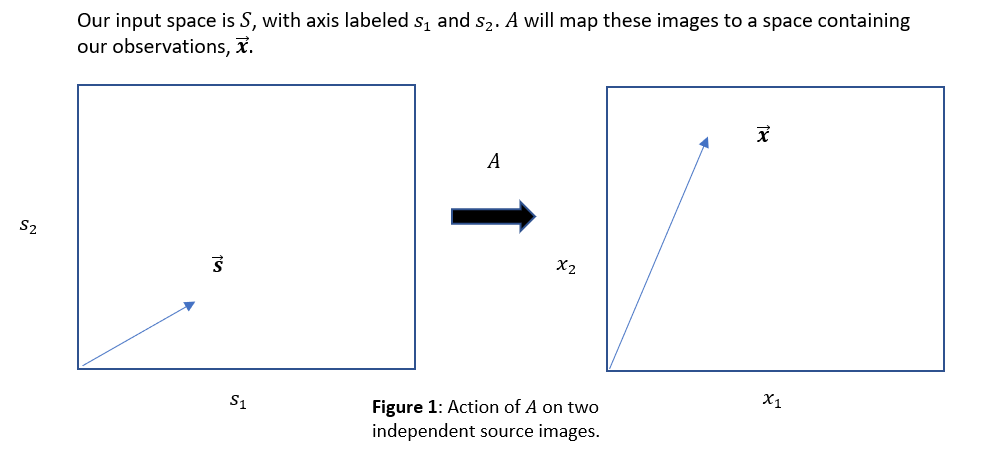

The arguments can be best described geometrically. In the following figure, we start in the lower left region with our original unknown signals $\vec{s}$ and work up and to the right and finally back down again to arrive at what is hopefully a decent approximation to our desired input signals.

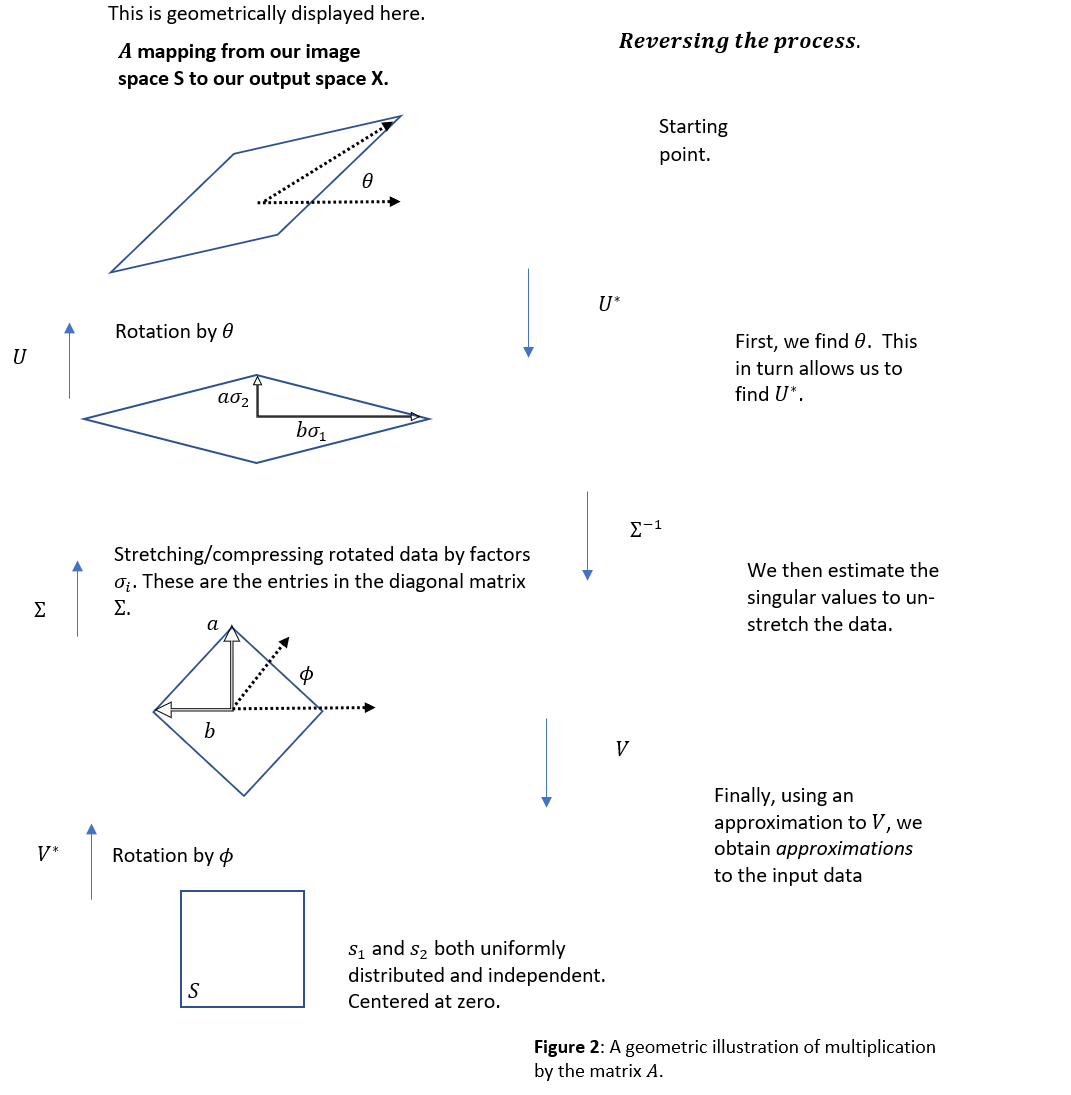

The process is broken down into three parts. Starting at the top of the second column in __Figure 1__, we must find and approximation to $U^*$, which we will denote as $\tilde{U}^*$. Second, we must undo multiplication by $\Sigma$ by approximating it as $\tilde{\Sigma}^{-1}$. Thirdly, we must similarly approximate $V$ as $\tilde{V}$. Once we have these three components, we can reconstruct the source images as follows:

$$
\vec{s} = V \Sigma^{-1} U^* \vec{x} \approx \tilde{V} \tilde{\Sigma}^{-1} \tilde{U}^* \vec{x}
$$


<u>__Part 1__</u>: Obtain $\tilde{U}^*$

We must find the direction that maximizes the variance of the data. This will allow us to rotate the data back as illustrated in the top right portion of __Figure 2__ by an angle $\theta$. Per the discussion above, our data resides in $R^2$, so this problem can be framed as projecting each data point (of which there are $n$, the size of the image) onto a vector rotated by some amount $\theta$ off the positive $x$-axis. The component for a given point $j$ along this vector is given by the following dot product:

$$
\begin{bmatrix} x_{1}(j) & x_{2}(j)\end{bmatrix} \begin{bmatrix} cos(\theta)\cr sin(\theta)\end{bmatrix}
$$

Note that technically we must divide by a magnitude, however this factor will have no bearing on the objective function below. Next, we construct a function that measures the variance of these new components and find its maximum. In the function below we assume the data (that it, each image as a flattened array) is mean-centered, so it is ommitted from the variance calculation. The objective function for a given $\theta$ is as follows:

$$
Var(\theta) = \sum_{j=1}^{n} \left (  \begin{bmatrix} x_{1}(j) & x_{2}(j)\end{bmatrix} \begin{bmatrix} cos(\theta)\cr sin(\theta)\end{bmatrix}   \right)^2
$$

The $\theta$ returned by differentiating the above function and setting equal to zero may be a minimum or a maximum and isn’t necessarily the $\theta$ in __Figure 2__ (the same applies to the calculation of $\phi$ below). Ultimately, it will not matter. The goal is simply, for now, to rotate the data so that the principal components are at 0 and $\pi /2$ radians. Therefore, there will likely be a rotational error. As a related aside, one of the reasons reason we require non-Gaussian data is that the 'rotation reversal' steps will not be possible with mean-centered normalized data since there will be no direction of greatest variance.

By differentiating, setting to zero, and solving for $\theta$, one is able to obtain the following result after the tedious algerbra and necessary patience.

$$
\theta^* = \frac{1}{2} \tan^{-1} \left(\frac{-2\sum_{j=1}^{n} x_1(j) \cdot x_2(j)}{\sum_{j=1}^{n} (x_2(j)^2 - x_1(j)^2)}\right) = \frac{1}{2} \tan^{-1} \left(\frac{\sum_{j=1}^{n} r^2(j) \sin 2\Phi(j)}{\sum_{j=1}^{n} r^2(j) \cos 2\Phi(j)}\right)
$$

where each point is represented in its equivalent polar-coordinate form (the polar angle $\Phi$ indexed by $j$ is not to be confused with the $\phi$ in __Figure 2__) :
$$
\begin{bmatrix}
x_1(j) \\
x_2(j)
\end{bmatrix} =
\begin{bmatrix}
r(j) \cos(\Phi(j)) \\
r(j) \sin(\Phi(j))
\end{bmatrix}
$$

Using this result, we can form the first reconstructed rotation matrix:

$$
\tilde{U}^* =
\begin{bmatrix}
\cos(\theta^*) & \sin(\theta^*) \\
-\sin(\theta^*) & \cos(\theta^*)
\end{bmatrix}
$$

<u>__Part 2__</u>: Obtain $\tilde{\Sigma}^{-1}$

From my [notebook on PCA](../PCA_linear/pca_linear_oscillation_system.ipynb), we know the variances $\lambda_i$ and singular values $\sigma_i$ (entries in $\Sigma$) are related as follows:

$$\lambda_i = \frac{\sigma_{i}^2}{n-1}$$

Since the singular values are ordered on the diagonal of $\Sigma$ from largest to smallest and $\Sigma$ itself is a diagonal matrix, along with the fact that the principal axes are orthogonal, we have:

$$
\tilde{\Sigma}^{-1} =
\begin{bmatrix}
\frac{1}{\sigma_1} & 0 \\
0 & \frac{1}{\sigma_2}
\end{bmatrix}
$$

with

$$
\sigma_1 = \max\left(\sqrt{(n-1) \cdot \text{Var}(\theta^*)}, \sqrt{(n-1) \cdot \text{Var}(\theta^* - \frac{\pi}{2})}\right)
$$

$$
\sigma_2 = \min\left(\sqrt{(n-1) \cdot \text{Var}(\theta^*)}, \sqrt{(n-1) \cdot \text{Var}(\theta^* - \frac{\pi}{2})}\right)
$$

<u>__Part 3__</u>: Obtain $\tilde{V}$

We must now apply a final rotation with the goal of producing componenets that are independent. Assuming the components are non-Gaussian, it makes sense to rotate the data in such a way that one of the components is as non-Gaussian as possible. This represents separating the two signals, and the most common way of doing this is finding an angle $\phi$ to rotate the data by, as in Step 1 above. A substitute measure for non-Gaussian data is Kurtosis. The higher the Kurtosis, the less Gaussian the data is. This process is done with our most up-to-date data obtained after the rotation by $\phi^*$ and the un-stretching by $\tilde{\Sigma}^{-1}$ (i.e. not the $x_1$ and $x_2$ we started with). We will denote our current data by $\tilde{x}_1$ and $\tilde{x}_2$.

This leads to the following objective function we wish to maximize:

$$
Kurt(\phi)=\sum_{j=1}^{n} \left[\begin{array}{cc} 
\tilde{x}_1(j) & \tilde{x}_2(j) 
\end{array}\right] \left[\begin{array}{c} 
\cos(\phi) \\ 
\sin(\phi) 
\end{array}\right]^4
$$

As before, differentiating and setting to zero, we obtain the following:

$$
\phi^* = \frac{1}{4} \tan^{-1} \left( \frac{-\sum_{j=1}^{n} \left[ 2 \tilde{x}_1^3 \tilde{x}_2 - 2 \tilde{x}_1 \tilde{x}_2^3 \right] / \left[ \tilde{x}_1^2 + \tilde{x}_2^2 \right]}{\sum_{j=1}^{n} \left[ 3 \tilde{x}_1^2 \tilde{x}_2^2 - \frac{1}{2} \tilde{x}_1^4 - \frac{1}{2} \tilde{x}_2^4 \right] / \left[ \tilde{x}_1^2 + \tilde{x}_2^2 \right]} \right) = \frac{1}{4} \tan^{-1} \left( \frac{\sum_{j=1}^{n} r^2(j) \sin 4\Psi(j)}{\sum_{j=1}^{n} r^2(j) \cos 4\Psi(j)} \right)
$$

Note in the first result we omit the $j$ for readability. We convert the result to polar coordinates as before, resulting in the usage of the polar angle $\Psi$.

Finally, we obtain the rotation matrix:

$$
\tilde{V} = \begin{bmatrix} 
\cos(\phi^*) & \sin(\phi^*) \\ 
-\sin(\phi^*) & \cos(\phi^*) 
\end{bmatrix}
$$

<u>__Application__</u>


The algorithm’s success is highly sensitive to the weights used to mix the images and the nature of the images themselves. For example, if two images are mixed that aren’t sufficiently non-Gaussian or independent, then the algorithm will have a harder time distinguishing them. Similarly, if each image isn’t sufficiently uniform, such as having pixel values in the same general range, there will be multiple independent components. This leads to confusion on what components we are interested in separating and which we are not. For example, a really bright spot on an image among a generally darker set of pixels will skew our results.

We start with the result we hope to obtain: the original source images $s_1$ and $s_2$. We will then artificially mix them using a custom mixing matrix $A$, and then apply the ICA algorithm and see what results. Our first source images will consist of a city skyline and the second will be clouds. In the cells below we will load in the images and inspect them.

In [2]:
# Imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize

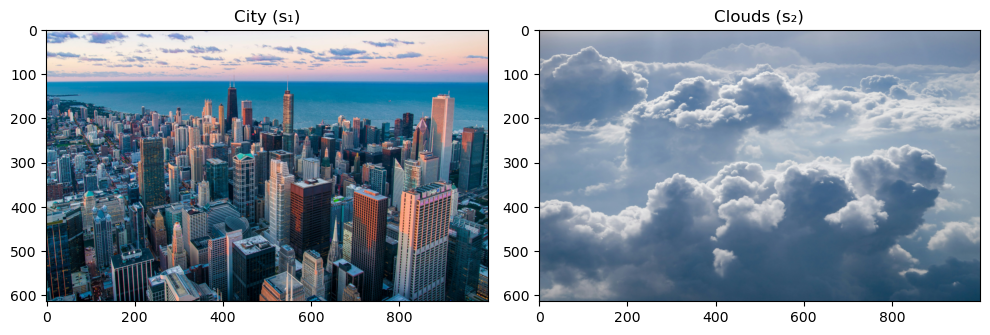

In [4]:
# Relative paths to the images.
city_path = r"supporting_images/pedro-lastra-Nyvq2juw4_o-unsplash.jpg"
cloud_path = r"supporting_images/zbynek-burival-8iZG31eXkks-unsplash.jpg"

# Read the images.
city_image = np.array(Image.open(city_path))
cloud_image = np.array(Image.open(cloud_path))

# We will resize the images and maintain the aspect ratio of the city image.
new_width = 1000  # Change as desired.

# Resize the city image to a new width while maintainig the aspect ratio.
original_height_city, original_width_city = city_image.shape[:2]
new_height = int(original_height_city * (new_width / original_width_city))
resized_city_image = resize(city_image, (new_height, new_width), anti_aliasing=True)

# Resize the cloud image, it's pretty close in dimensions to begin with.
resized_cloud_image = resize(cloud_image, (new_height, new_width), anti_aliasing=True)

#View images.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(resized_city_image)
axes[0].set_title('City (s\u2081)')

axes[1].imshow(resized_cloud_image)
axes[1].set_title('Clouds (s\u2082)')

plt.tight_layout()
plt.show()


Now we can flatten these images and view their distributions. First, we will normalize them from 0 to 1. They appear to be fairly non-Gaussian.

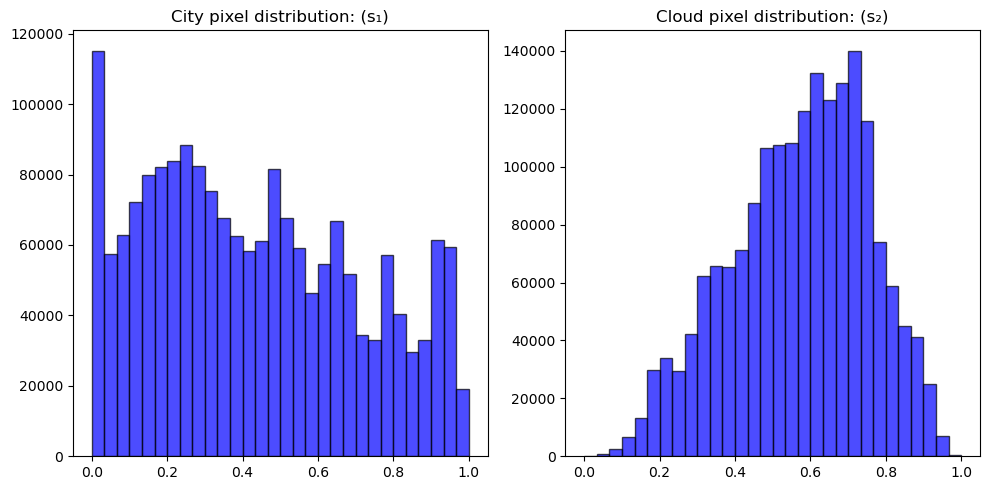

In [7]:
# Flatten the images along one dimension.
city_flat_array = resized_city_image.ravel()
cloud_flat_array = resized_cloud_image.ravel()

# Normalize the images from 0 to 1.
city_scaled = (city_flat_array - city_flat_array.min())/ (city_flat_array.max() - city_flat_array.min())
cloud_scaled = (cloud_flat_array - cloud_flat_array.min())/ (cloud_flat_array.max() - cloud_flat_array.min())

# Plot the histograms of the pixel intensities.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].hist(city_scaled, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('City pixel distribution: (s\u2081)')

axes[1].hist(cloud_scaled, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1].set_title('Cloud pixel distribution: (s\u2082)')

plt.tight_layout()
plt.show()

We will now define our mixnig matrix $A$. My approach is to set the coefficient for the city image to $1$ and add varying amounts of cloudy noise by setting the second column to values other than one. One will be heavily cloudy and the other oonly slightly, as seen in the plots below. It is at this point we have our given data from which we wish to reconstruct the original imagery of the city.

In [8]:
A = np.array([[1, 3.5], [1, 0.8]])

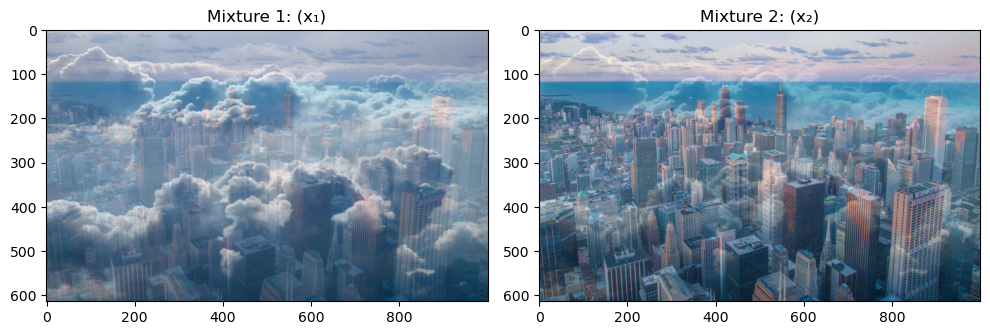

In [9]:
x_1 = A[0, 0]*city_scaled + A[0, 1]*cloud_scaled
x_2 = A[1, 0]*city_scaled + A[1, 1]*cloud_scaled

x_1_scaled = (x_1 - x_1.min())/ (x_1.max() - x_1.min())
x_2_scaled = (x_2 - x_2.min())/ (x_2.max() - x_2.min())

# Plot the mixtures.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(x_1_scaled.reshape((new_height, new_width, 3)))
axes[0].set_title('Mixture 1: (x\u2081)')

axes[1].imshow(x_2_scaled.reshape((new_height, new_width, 3)))
axes[1].set_title('Mixture 2: (x\u2082)')

# Adjust layout to avoid overlap anbd plot.
plt.tight_layout()
plt.show()

__Step 1__ is to subtract the mean from our data and find $\tilde{U}^*$ according to the equations above. 

In [10]:
# Center the data.
x_1_centered = x_1_scaled - np.mean(x_1_scaled)
x_2_centered = x_2_scaled - np.mean(x_2_scaled)

# Find U_tilde_star
numerator = np.sum(np.multiply(x_1_centered, x_2_centered))
denominator = np.sum(np.multiply(x_2_centered, x_2_centered) - np.multiply(x_1_centered, x_1_centered))
theta_star = (1/2)*np.arctan(2*numerator/denominator)
U_tilde_star = np.array([[np.cos(theta_star), np.sin(theta_star)],
                         [-1*np.sin(theta_star), np.cos(theta_star)]])

__Step 2__ is to find $\tilde{\Sigma}^{-1}$.

In [11]:
n = len(x_1)

intermediate_1 = np.cos(theta_star)*x_1_centered + np.sin(theta_star)*x_2_centered
intermediate_2 = np.sum(np.multiply(intermediate_1, intermediate_1))
r_1 = np.sqrt((n-1)*intermediate_2)

intermediate_3 = np.cos(theta_star - np.pi/2)*x_1_centered + np.sin(theta_star - np.pi/2)*x_2_centered
intermediate_4 = np.sum(np.multiply(intermediate_3, intermediate_3))
r_2 = np.sqrt((n-1)*intermediate_4)

# These are the singular values.
singular_1 = max(r_1, r_2)
singular_2 = min(r_1, r_2)

# Inverse of a diagonal mtrix is composed of the recipricols.
Sigma_tilde_inv = np.array([[1/singular_1, 0],
                            [0, 1/singular_2]])

At this point, we will perform the first two multiplications (first by $\tilde{U}^*$ and then by $\tilde{\Sigma}^{-1}$), and hence later only be left with the third and final multiplication by $\tilde{V}$. These calculations are in the following cell.

In [12]:
# Obtain the intermediate result.
x_1_centered_tilde = Sigma_tilde_inv[0, 0]*(U_tilde_star[0, 0]*x_1_centered + U_tilde_star[0, 1]*x_2_centered)
x_2_centered_tilde = Sigma_tilde_inv[1, 1]*(U_tilde_star[1, 0]*x_1_centered + U_tilde_star[1, 1]*x_2_centered)

The following cell will calulate $\phi^*$ according to the equations above. This will enable us to obtain the final matrix, $\tilde{V}$.

In [13]:
# A series of calculations for obtaining phi
inter_denom = np.multiply(x_1_centered_tilde, x_1_centered_tilde) + np.multiply(x_2_centered_tilde, x_2_centered_tilde)
inter_denom[inter_denom == 0] = 1e-7
inter_11 = np.multiply(np.power(x_1_centered_tilde, 3), x_2_centered_tilde)
inter_12 = 2*(np.multiply(x_1_centered_tilde, np.power(x_2_centered_tilde, 3)))
inter1 = inter_11 - inter_12
inter2 = 3*np.multiply(np.power(x_1_centered_tilde, 2), np.power(x_2_centered_tilde, 2))
inter3 = (1/2)*np.power(x_1_centered_tilde, 4)
inter4 = (1/2)*np.power(x_2_centered_tilde, 4)
inter5 = inter2 - inter3 - inter4

numerator = -1*np.sum(np.divide(inter1, inter_denom))
denominator = np.sum(np.divide(inter5, inter_denom))

phi_star = (1/4)*np.arctan(numerator/denominator)

# Form the rottion matrix V tilde
V_tilde = np.array([[np.cos(phi_star), np.sin(phi_star)],
                    [-1*np.sin(phi_star), np.cos(phi_star)]])

Apply $\tilde{V}$ to the intermediate results above. We will also scale hem to a range of 0 to 1.

In [15]:
# Apply V tilde to obtain the reconstructions of the source images.
s_1_tilde = V_tilde[0, 0]*x_1_centered_tilde + V_tilde[0, 1]*x_2_centered_tilde
s_2_tilde = V_tilde[1, 0]*x_1_centered_tilde + V_tilde[1, 1]*x_2_centered_tilde

# Scale the approximations of the original source images.
s_1_tilde_scaled = (s_1_tilde - s_1_tilde.min())/ (s_1_tilde.max() - s_1_tilde.min())
s_2_tilde_scaled = (s_2_tilde - s_2_tilde.min())/ (s_2_tilde.max() - s_2_tilde.min())

The following cell will re-plot the original mixture images for viewing convenience. 

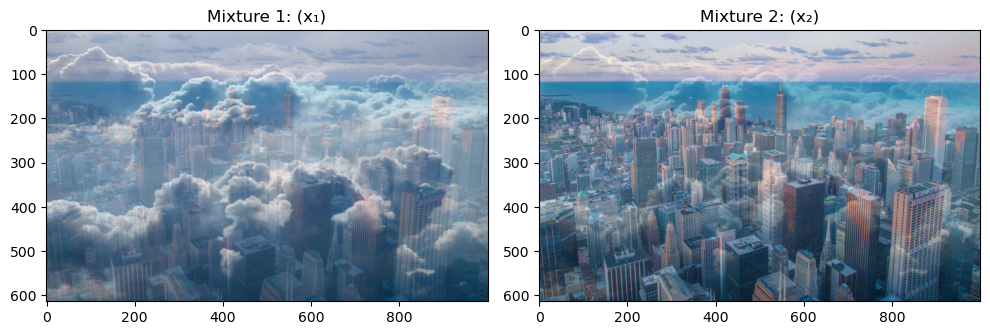

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(x_1_scaled.reshape((new_height, new_width, 3)))
axes[0].set_title('Mixture 1: (x\u2081)')
axes[1].imshow(x_2_scaled.reshape((new_height, new_width, 3)))
axes[1].set_title('Mixture 2: (x\u2082)')
plt.tight_layout()
plt.show()

The process of ICA is complete and we can now view our results: the reconstructions of the original clean city and cloud images.

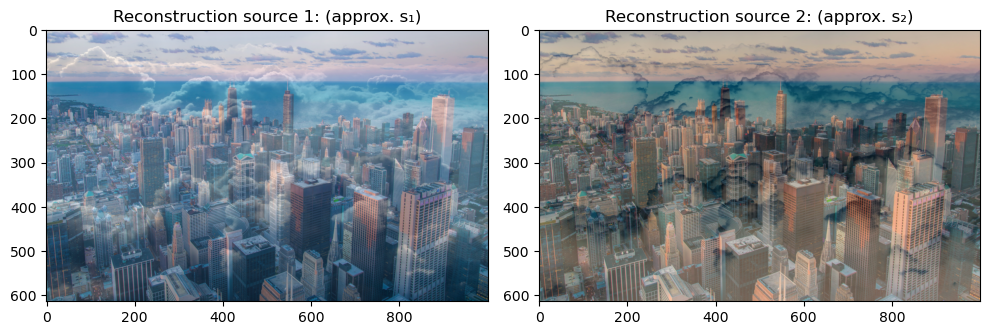

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(s_1_tilde_scaled.reshape((new_height, new_width, 3)))
axes[0].set_title('Reconstruction source 1: (approx. s\u2081)')

axes[1].imshow(s_2_tilde_scaled.reshape((new_height, new_width, 3)))
axes[1].set_title('Reconstruction source 2: (approx. s\u2082)')

# Adjust layout to avoid overlap anbd plot.
plt.tight_layout()
plt.show()


Not a bad result! Feel free to experiment with different mixture weights by modifying the matrix $A$. As a final note, _scikit-learn_ has an implementation of the algorithm that will enable further expermentation.

Thank you for reading!

__References__

Some links to the data as well as an interesting paper fo those who are curious.

__[1]__ Cloud image. Photo by Zbynek Burival on Unsplash. https://unsplash.com/@zburival?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash

__[2]__ City image. Photo by Pedro Lastra on Unsplash. https://unsplash.com/@peterlaster?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash

__[3]__ Lecture Notes provided by J. Nathan Kutz. https://faculty.washington.edu/kutz/KutzBook/KutzBook.html

__[4]__ Shlens, Jonathan. (2014). "A Tutorial of Independent Component Analysis". https://doi.org/10.48550/arXiv.1404.2986


